In [1]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.original

A peak of the top 10 rows of the data.

In [3]:
display(X.head(10))

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red  
5      9.4        5   red  
6      9.4        5   red  
7     10.0        7   red  
8      9.5        7   red  
9     10.5        5   red

Checking the column names of the data. This includes possible features and target for machine learning.

In [4]:
print(f'Columns: \n{X.columns}\n')
print(f'Shape: {X.shape}\n')
print(f'Info: \n{X.info()}\n')

Columns: 
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

Shape: (6497, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol    

Quick checking of statistics of data. Adding parameter include='all' to also see statistics for color -- which is a categorical data.

In [5]:
display(X.describe(include='all'))

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count     6497.000000       6497.000000  6497.000000     6497.000000   
unique            NaN               NaN          NaN             NaN   
top               NaN               NaN          NaN             NaN   
freq              NaN               NaN          NaN             NaN   
mean         7.215307          0.339666     0.318633        5.443235   
std          1.296434          0.164636     0.145318        4.757804   
min          3.800000          0.080000     0.000000        0.600000   
25%          6.400000          0.230000     0.250000        1.800000   
50%          7.000000          0.290000     0.310000        3.000000   
75%          7.700000          0.400000     0.390000        8.100000   
max         15.900000          1.580000     1.660000       65.800000   

          chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count   6497.000000          6497.000000           6497.000000  6497.000000   
unique          NaN                  NaN                   NaN          NaN   
top             NaN                  NaN                   NaN          NaN   
freq            NaN                  NaN                   NaN          NaN   
mean       0.056034            30.525319            115.744574     0.994697   
std        0.035034            17.749400             56.521855     0.002999   
min        0.009000             1.000000              6.000000     0.987110   
25%        0.038000            17.000000             77.000000     0.992340   
50%        0.047000            29.000000            118.000000     0.994890   
75%        0.065000            41.000000            156.000000     0.996990   
max        0.611000           289.000000            440.000000     1.038980   

                 pH    sulphates      alcohol      quality  color  
count   6497.000000  6497.000000  6497.000000  6497.000000   6497  
unique          NaN          NaN          NaN          NaN      2  
top             NaN          NaN          NaN          NaN  white  
freq            NaN          NaN          NaN          NaN   4898  
mean       3.218501     0.531268    10.491801     5.818378    NaN  
std        0.160787     0.148806     1.192712     0.873255    NaN  
min        2.720000     0.220000     8.000000     3.000000    NaN  
25%        3.110000     0.430000     9.500000     5.000000    NaN  
50%        3.210000     0.510000    10.300000     6.000000    NaN  
75%        3.320000     0.600000    11.300000     6.000000    NaN  
max        4.010000     2.000000    14.900000     9.000000    NaN

It can be observed that the scales vary for each feature. *chlorides* ranges from ~0.009-0.611 while *total_sulfur_dioxide* ranges from 6.0-440.0. It is obvious that proper scaling should be used later if we want to compare and visualize the data.

Visualizing the proportion of the count of the different quality. Note that using bar graph over pie chart to visualize proportions is a preference.
Here, it is observed that the majority of the quality score is centered on 6.0.

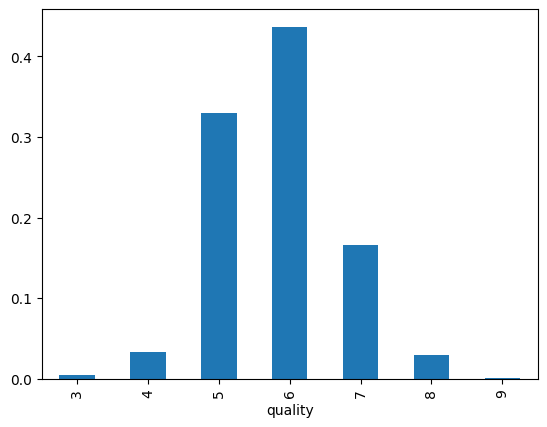

In [6]:
X['quality'].value_counts(normalize=True).sort_index().plot(kind='bar');

<Figure size 1000x1000 with 0 Axes>

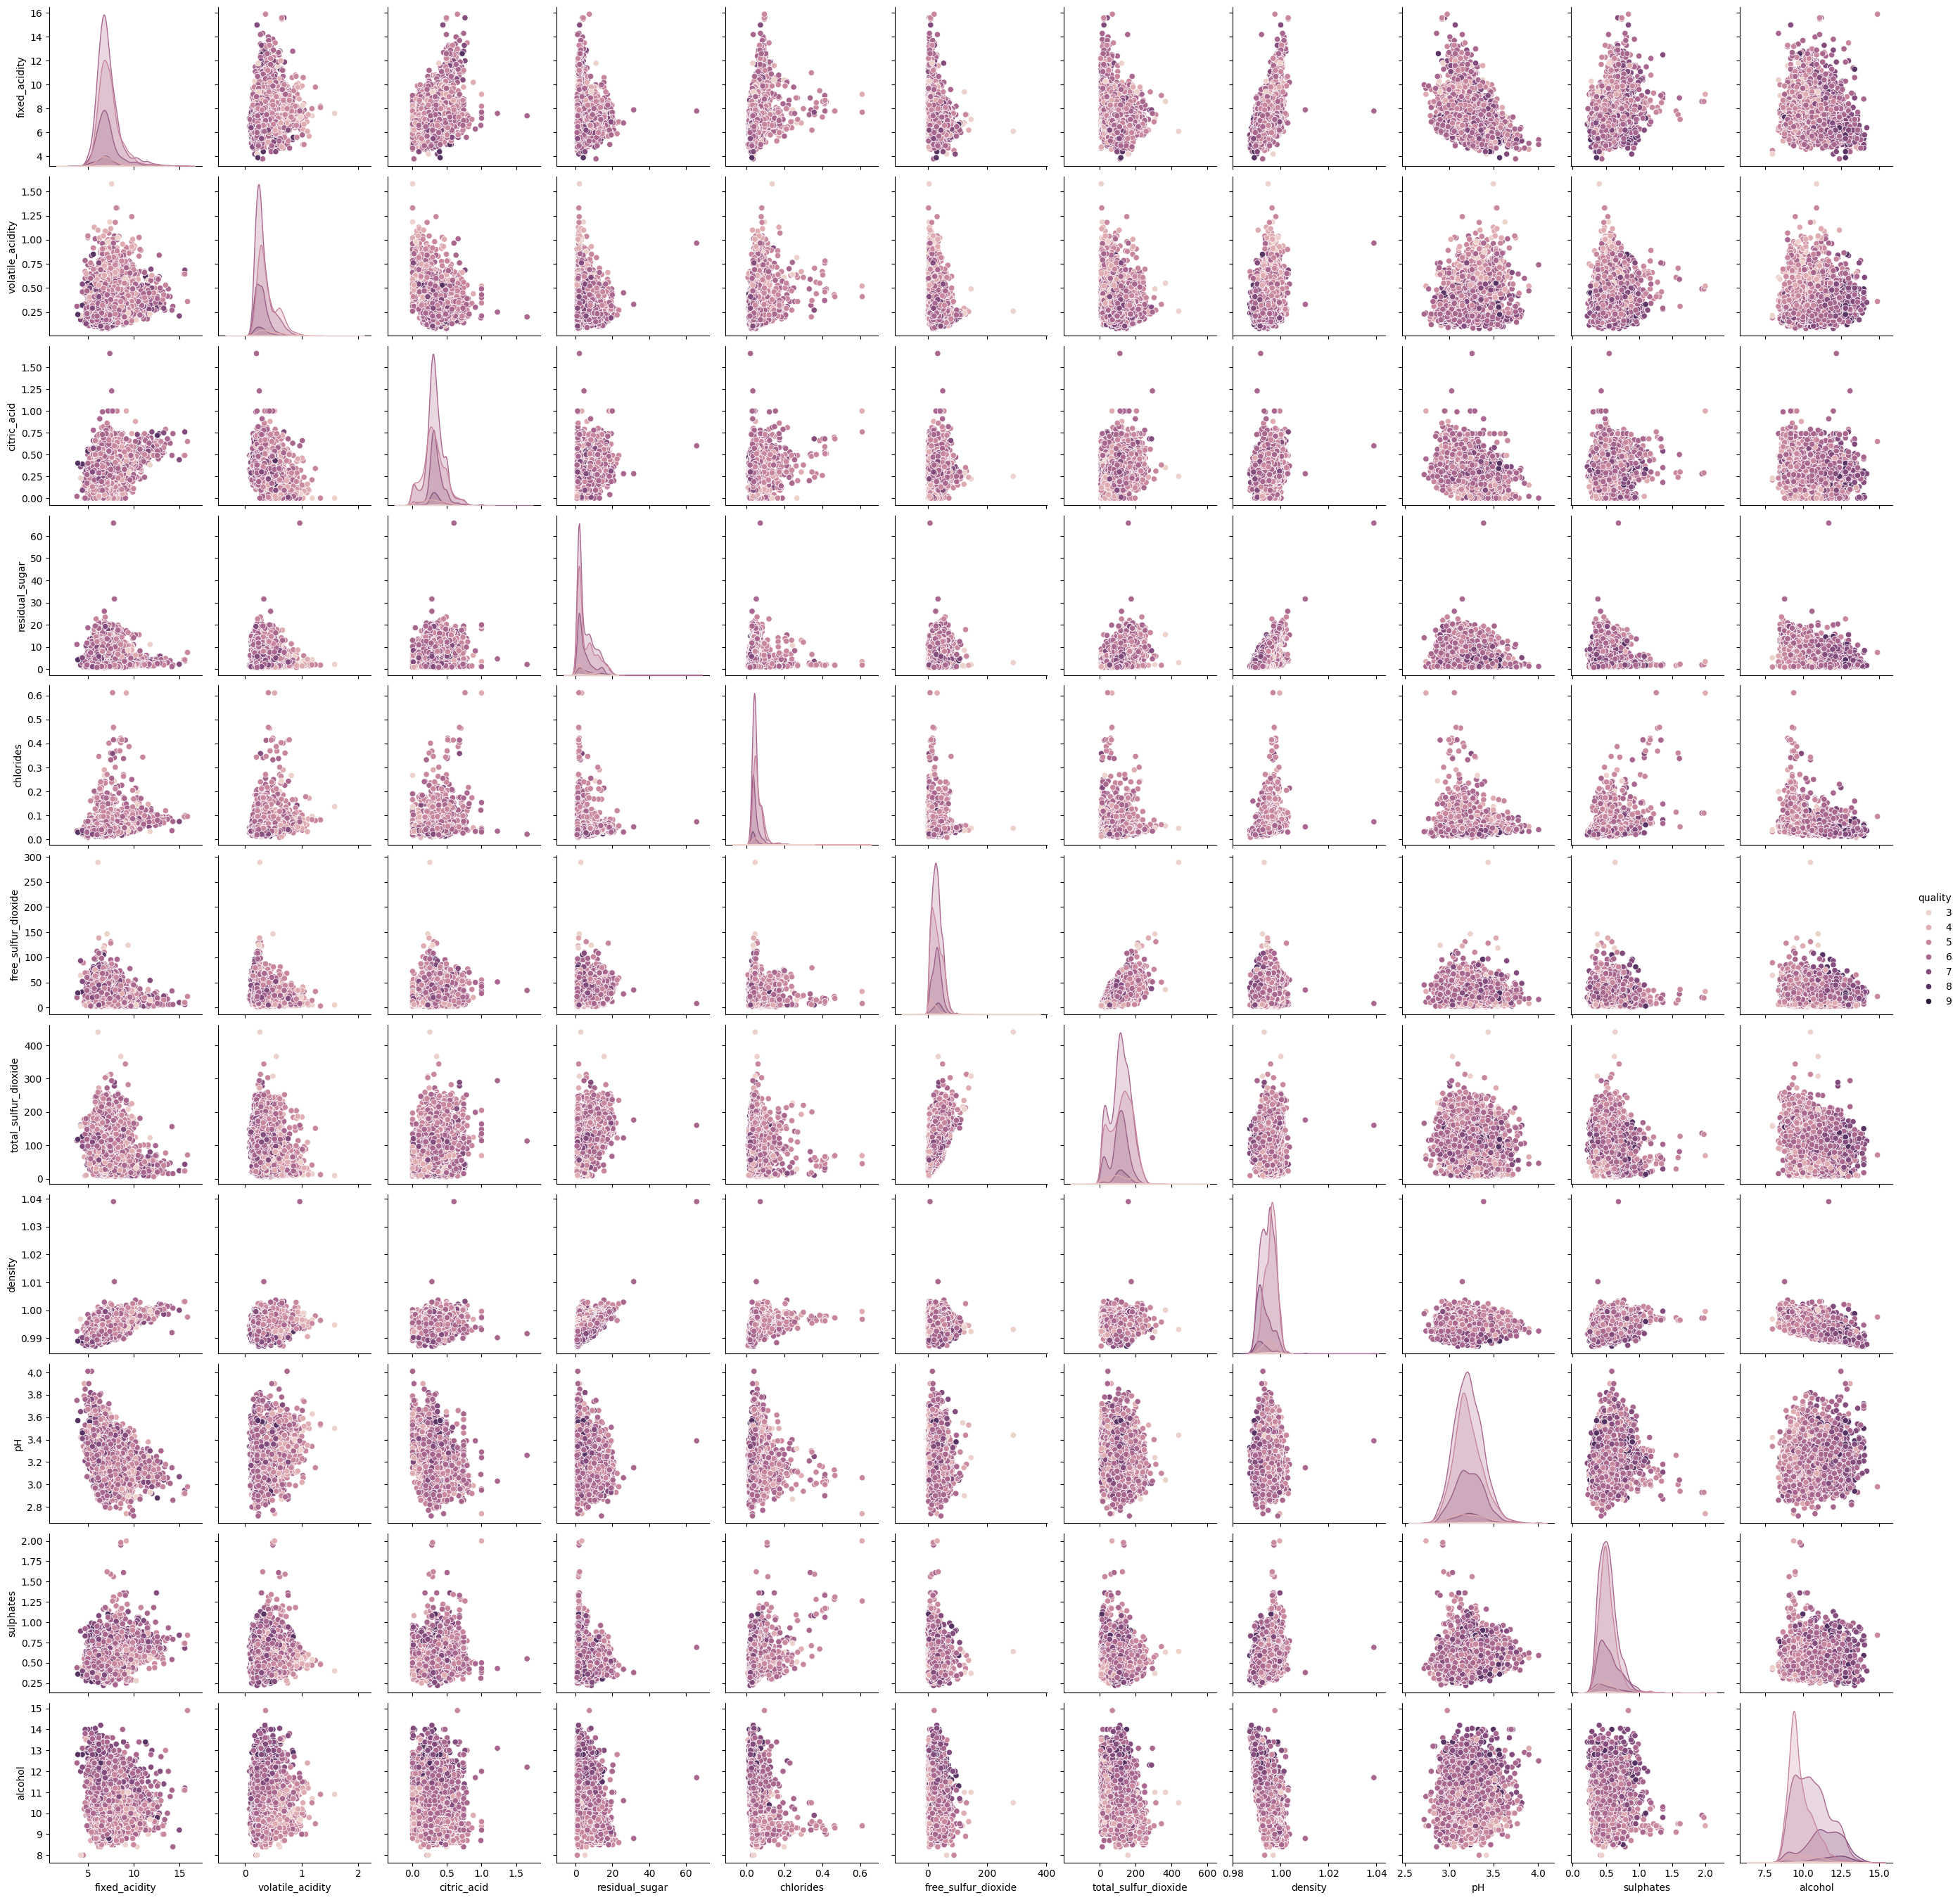

In [7]:
plt.figure(figsize=(10, 10))
sns.pairplot(X.drop('color', axis=1), hue='quality')

For each pair of features shown on a scatter plot, there seems to be little distinction for wines per quality score. But this could be somewhat misleading since it is know that majority of the wines have a score of {5, 6, 7}.

In [8]:
scaler = StandardScaler()
X2 = X.drop(['color', 'quality'], axis=1).copy()
X_scaled = scaler.fit_transform(X2)
X_scaled = pd.DataFrame(X_scaled, columns=X2.columns)
display(X_scaled)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.142473          2.188833    -2.192833       -0.744778   0.569958   
1          0.451036          3.282235    -2.192833       -0.597640   1.197975   
2          0.451036          2.553300    -1.917553       -0.660699   1.026697   
3          3.073817         -0.362438     1.661085       -0.744778   0.541412   
4          0.142473          2.188833    -2.192833       -0.744778   0.569958   
...             ...               ...          ...             ...        ...   
6492      -0.783214         -0.787650    -0.197054       -0.807837  -0.486252   
6493      -0.474652         -0.119460     0.284686        0.537425  -0.257883   
6494      -0.551792         -0.605417    -0.885253       -0.891916  -0.429160   
6495      -1.323198         -0.301694    -0.128234       -0.912936  -0.971538   
6496      -0.937495         -0.787650     0.422326       -0.975995  -1.028631   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0               -1.100140             -1.446359  1.034993  1.813090   
1               -0.311320             -0.862469  0.701486 -0.115073   
2               -0.874763             -1.092486  0.768188  0.258120   
3               -0.762074             -0.986324  1.101694 -0.363868   
4               -1.100140             -1.446359  1.034993  1.813090   
...                   ...                   ...       ...       ...   
6492            -0.367664             -0.420128 -1.186161  0.320319   
6493             1.491697              0.924588  0.067824 -0.426067   
6494            -0.029599             -0.083949 -0.719251 -1.421248   
6495            -0.593041             -0.101642 -2.003251  0.755710   
6496            -0.480353             -0.313966 -1.763127  0.258120   

      sulphates   alcohol  
0      0.193097 -0.915464  
1      0.999579 -0.580068  
2      0.797958 -0.580068  
3      0.327510 -0.580068  
4      0.193097 -0.915464  
...         ...       ...  
6492  -0.210144  0.593818  
6493  -0.478971 -0.747766  
6494  -0.478971 -0.915464  
6495  -1.016626  1.935402  
6496  -1.419867  1.096912  

[6497 rows x 11 columns]

In [19]:
def generate_colors(n_colors, colormap_name='viridis'):
    cmap = plt.get_cmap(colormap_name)  # Choose a colormap
    colors = [cmap(i) for i in np.linspace(0, 1, n_colors)]  # Generate colors dynamically
    return colors


def raincloud_plot(dataframe, figsize=(25, 25)):
    fig, ax = plt.subplots(figsize=figsize)

    nrows = dataframe.shape[1]

    boxplots_colors = generate_colors(nrows)
    violin_colors = generate_colors(nrows)
    scatter_colors = generate_colors(nrows)

    # Boxplot
    bp = ax.boxplot(
        dataframe, 
        patch_artist=True, 
        vert=False, 
        widths=.15
    )

    # Change to the desired color and add transparency
    for patch, color in zip(bp['boxes'], boxplots_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.4)

    # Violinplot
    vp = ax.violinplot(
        dataframe,
        points=500, 
        showmeans=False, 
        showextrema=False, 
        showmedians=False, 
        vert=False,
        side='high'
    )

    for idx, b in enumerate(vp['bodies']):
        b.set_color(violin_colors[idx])
        b.set_edgecolor('black')


    # Scatterplot
    for idx, features in enumerate(dataframe):
        # Add jitter effect so the features do not overlap on the y-axis
        y = np.full(len(dataframe[features]), idx + .8)
        idxs = np.arange(len(y))
        out = y.astype(float)
        out.flat[idxs] += np.random.uniform(low=-.1, high=.1, size=len(idxs))
        y = out
        plt.scatter(dataframe[features], y, s=.3, c=scatter_colors[idx], 
                    alpha=0.3)

    plt.yticks(np.arange(1,nrows+1,1), dataframe.columns.to_list())
    plt.xlabel('Normalized Values')
    plt.title("Raincloud plot")
    plt.show()

C:\Users\Deomary\AppData\Local\Temp\ipykernel_9200\314170237.py:53: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(dataframe[features], y, s=.3, c=scatter_colors[idx],


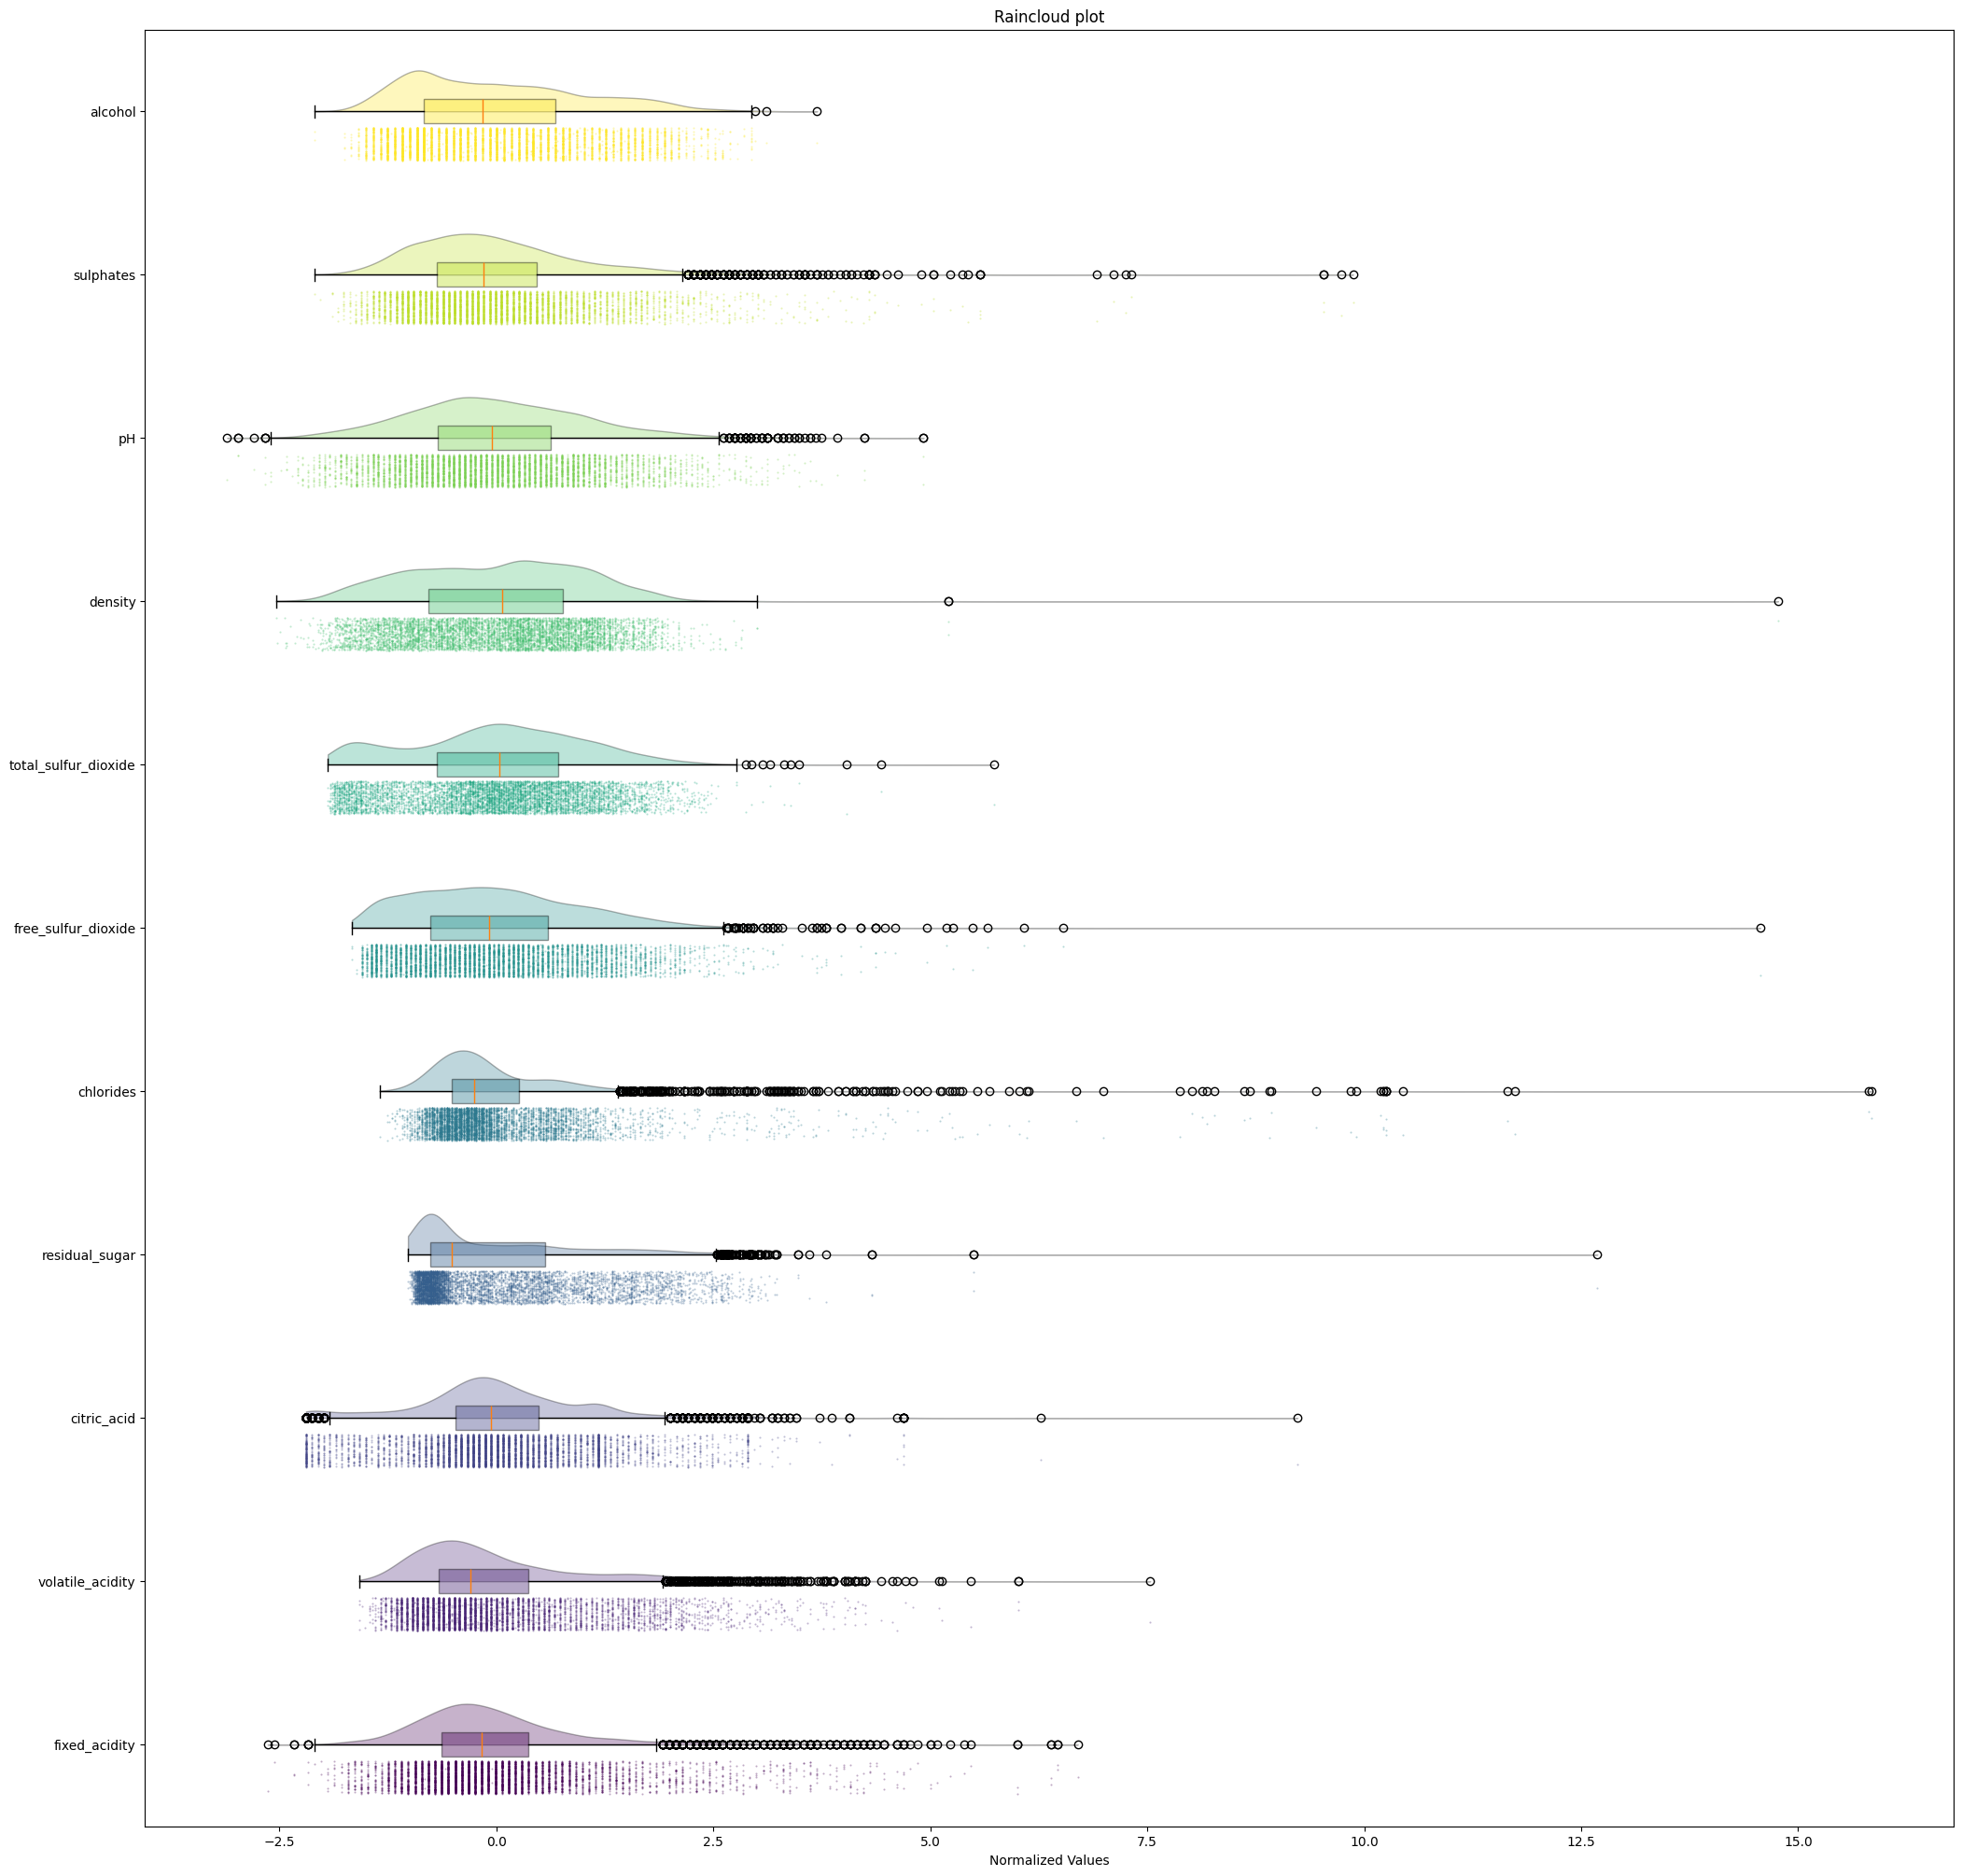

In [20]:
raincloud_plot(X_scaled)

Shown is a raincloud plot (a combination of top-side violin plot, box plot, and strip plot which appears as a rain cloud). This plot was chosen to visualize distribution together with the standard percentiles.

[<Axes: >]

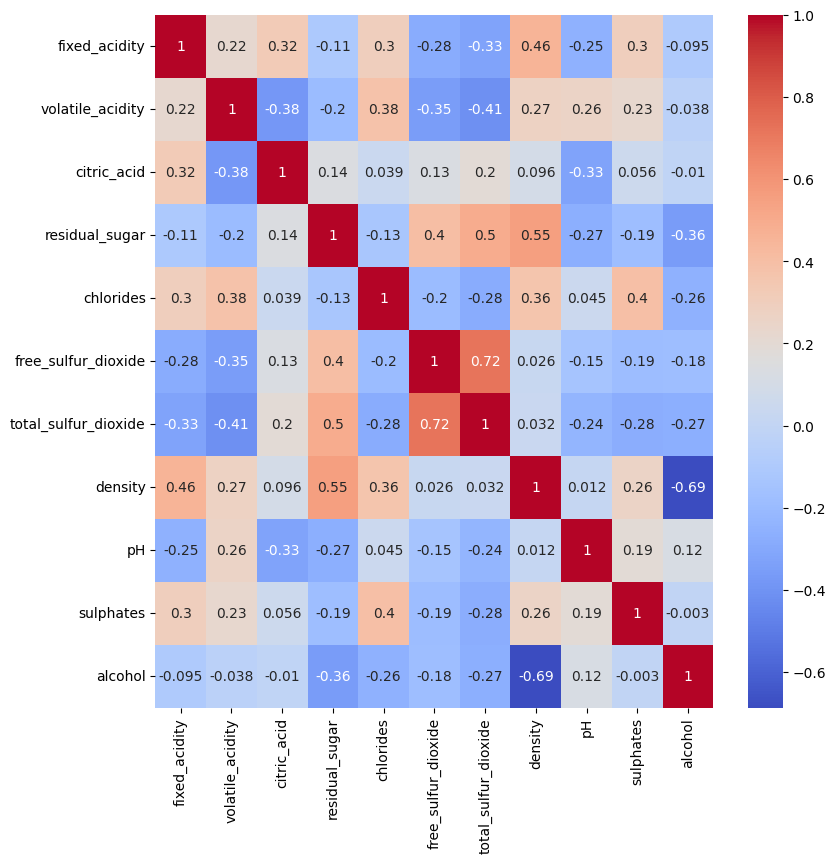

In [25]:
plt.figure(figsize=(9, 9))
[sns.heatmap(X_scaled.corr(), annot=True, cmap='coolwarm')]

Shown is a heatmap of the correlation of the different features of the dataset to each other. Note here that normalized data does not affect correlation score since the standard deviations just cancel out each other. Pairs with noticeable correlation scores are total_sulfur_dioxide & free_sulfur_dioxide (positive correlation) and alcohol & density (negative correlation).

In [28]:
X_scaled['quality'] = X['quality']
melted_X = pd.melt(
    X_scaled,
    id_vars='quality',
    value_vars=X_scaled.columns
)
melted_X

quality       variable     value
0            5  fixed_acidity  0.142473
1            5  fixed_acidity  0.451036
2            5  fixed_acidity  0.451036
3            6  fixed_acidity  3.073817
4            5  fixed_acidity  0.142473
...        ...            ...       ...
71462        6        alcohol  0.593818
71463        5        alcohol -0.747766
71464        6        alcohol -0.915464
71465        7        alcohol  1.935402
71466        6        alcohol  1.096912

[71467 rows x 3 columns]

<Axes: xlabel='value', ylabel='variable'>

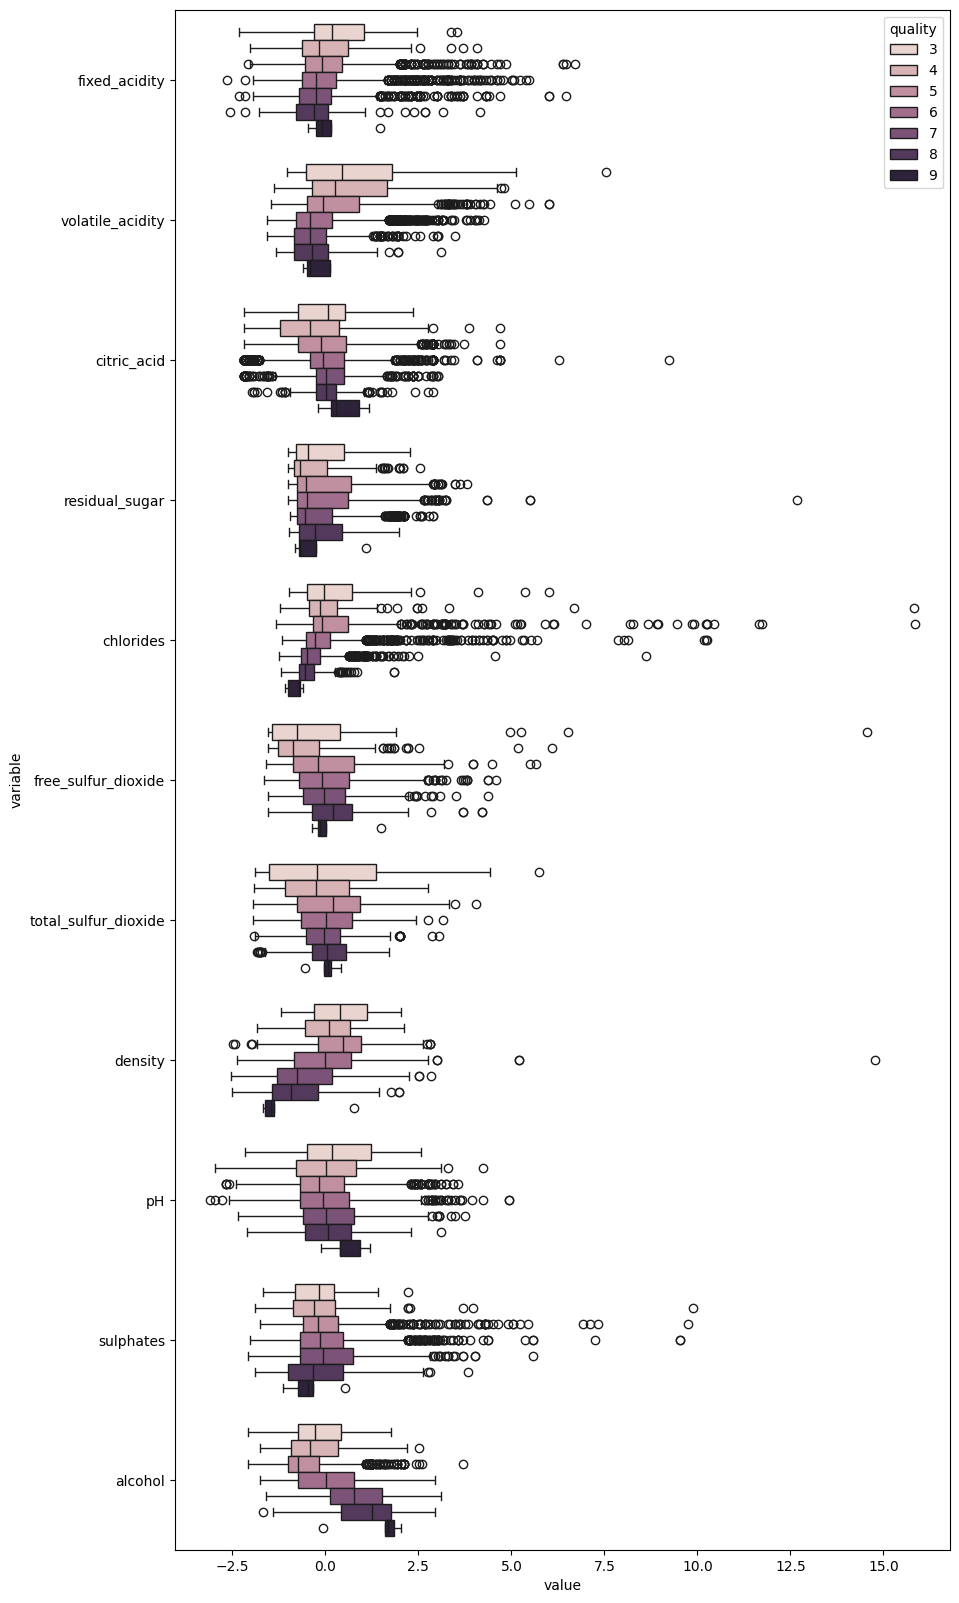

In [31]:
plt.figure(figsize=(10, 20))
sns.boxplot(
    data=melted_X,
    width=0.8,
    orient='h',
    x='value',
    y='variable',
    hue='quality'
)